In [620]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [621]:
#Загрука данных 
Data = pd.read_csv("Parsing_Cian.csv", sep = ',')

In [622]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393 entries, 0 to 8392
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   author                7592 non-null   object
 1   author_type           7595 non-null   object
 2   url                   7906 non-null   object
 3   location              7906 non-null   object
 4   deal_type             7906 non-null   object
 5   accommodation_type    7906 non-null   object
 6   floor                 7906 non-null   object
 7   floors_count          7906 non-null   object
 8   rooms_count           7906 non-null   object
 9   total_meters          7906 non-null   object
 10  price                 7893 non-null   object
 11  year_of_construction  7906 non-null   object
 12  object_type           7906 non-null   object
 13  have_loggia           7906 non-null   object
 14  parking_type          7906 non-null   object
 15  house_material_type   7906 non-null   

## Обозначение Колонок


* url - ссылка
* location           - локация объявления (город)
* deal_type          - тип объявления (продажа/аренда)
* accommodation_type - тип жилья (квартира, дом и т.д.)
* floor	           - этаж квартиры
* floors_count	   - количество этажей
* total_meters	   - площадь квартиры
* price	           - общая стоимость
* seller- 	является ли продавец агентом
* year_of_construction	год постройки здания
* object_type	тип жилья (новостройка\вторичка)
* have_loggia	наличие лоджий\балконов
* house_material_type	тип дома (монолитный, панельный и т.д.)
* heating_type	тип отопления
* finish_type	отделка
* living_meters	жилая площадь
* kitchen_meters	площадь кухни
* phone	номер телефона
* ceiling_height	высота потолка
* district	район
* street	улица
* house_number	номер дома
* underground	метро (+ мцд)
* residential_complex	жилой комплекс

In [625]:
# Выыедим первые 8 строк 
Data.head(8)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN
5,Максим Юсов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304233768/,Серпухов,sale,flat,2,3,1,46.7,...,-1,25 м²,6 м²,79647820594,-1,Серпухов,2-я Московская,6к3,NaN,NaN
6,ID 9655060,unknown,https://serpukhov.cian.ru/sale/flat/304697154/,Серпухов,sale,flat,3,5,1,29.0,...,-1,25 м²,-1,79645658245,3 м,Серпухов,Форсса,10,NaN,NaN
7,Этажи Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304332318/,Серпухов,sale,flat,3,6,1,19.1,...,-1,-1,-1,79647821411,-1,Серпухов,Крюкова,4,NaN,NaN


In [626]:
show = Data.shape
print(f"В Датафрейме Колонок:{show[1]}  Строк:{show[0]}")

В Датафрейме Колонок:27  Строк:8393


### Проанализиурем и определим колонки кторые влияют или могут влиять на цену квартиры

Согласно статьи из сайта по поиску, продаже и подборe квартиры ЦИАН 
https://www.cian.ru/blogs-kakie-faktory-vlijajut-na-rynochnuju-stoimost-kvartiry-273638/
на цену могут влиять следующие факторы :

* Метраж Кухни
* Наличие парковки и её тип
* Этаж расположения квартиры
* Общее количество этажей
* Отделка 
* Новостройка/Вторичка
* Год Постройки 
* Удалённость от Метро
* Наличие Балкона 



Исходя из времени работы компании на рынке недвижемости и отзовы о работе платформы, можно опираться на их даннын при анализе колонок .

Определим колонки которые могут влиять на цену квартиры 

Колонки : 


* residential_complex - название жилого комплекса , 
* district            - район, 
* phone               - Телефон,
* street              - Улица
* url                 - ссылка.
* deal_type           - Тип сделки 
* accommodation_type  - Тип Размещения
* house_number        - Номер Дома 
* heating_type        - Отопление

никак не влияют на цену квартиры, удаляем их 

In [634]:
#Удаляем ненужные колонки
Data_Purified = Data.drop(["residential_complex", "district", "phone", "street", "url", "deal_type", "accommodation_type" , "location", "house_number", "author", "author_type", "heating_type"] , axis = 1)

In [635]:
Data_Purified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393 entries, 0 to 8392
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   floor                 7906 non-null   object
 1   floors_count          7906 non-null   object
 2   rooms_count           7906 non-null   object
 3   total_meters          7906 non-null   object
 4   price                 7893 non-null   object
 5   year_of_construction  7906 non-null   object
 6   object_type           7906 non-null   object
 7   have_loggia           7906 non-null   object
 8   parking_type          7906 non-null   object
 9   house_material_type   7906 non-null   object
 10  finish_type           7906 non-null   object
 11  living_meters         7906 non-null   object
 12  kitchen_meters        7906 non-null   object
 13  ceiling_height        7906 non-null   object
 14  underground           5511 non-null   object
dtypes: object(15)
memory usage: 983.7+ KB


## Обработаем Данные 


Согласно описанию библеотеки по сбору данных отсутсвующие значения заменялись на '-1' Заменим их на NaN

In [638]:
Data_Purified.replace("-1", np.nan, inplace = True) 

Посмотрим количество нулевых значений и пропусков

<Axes: >

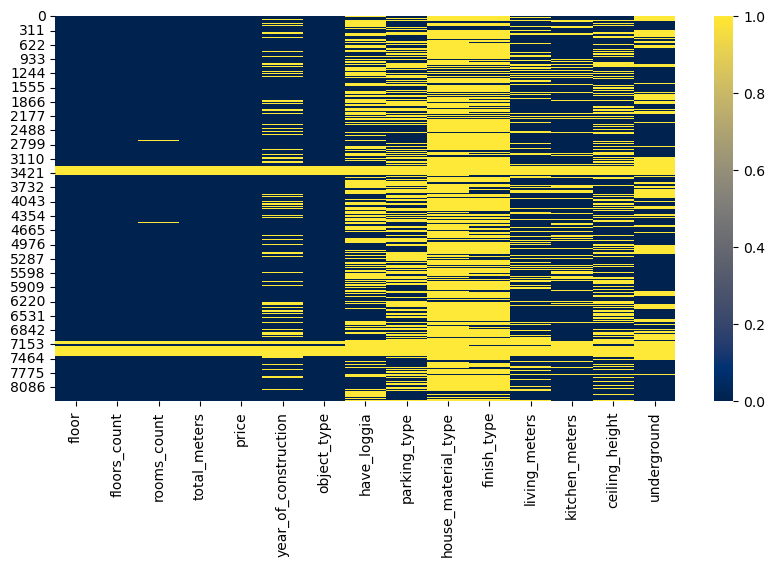

In [640]:
plt.figure(figsize=(10, 5))
sns.heatmap(Data_Purified.isnull(),cmap='cividis')

In [641]:
null_ = Data_Purified.isnull().sum().reset_index()
null_.columns = ['Колонки', 'NaN']
print(null_)

                 Колонки   NaN
0                  floor   487
1           floors_count   487
2            rooms_count   587
3           total_meters   487
4                  price   500
5   year_of_construction  1856
6            object_type   487
7            have_loggia  3895
8           parking_type  3981
9    house_material_type  6946
10           finish_type  6387
11         living_meters  2269
12        kitchen_meters  1838
13        ceiling_height  3258
14           underground  2882


In [642]:
Data_Purified.drop(["house_material_type", "finish_type"], axis = 1 , inplace = True )

In [643]:
Data_Purified.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393 entries, 0 to 8392
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   floor                 7906 non-null   object
 1   floors_count          7906 non-null   object
 2   rooms_count           7806 non-null   object
 3   total_meters          7906 non-null   object
 4   price                 7893 non-null   object
 5   year_of_construction  6537 non-null   object
 6   object_type           7906 non-null   object
 7   have_loggia           4498 non-null   object
 8   parking_type          4412 non-null   object
 9   living_meters         6124 non-null   object
 10  kitchen_meters        6555 non-null   object
 11  ceiling_height        5135 non-null   object
 12  underground           5511 non-null   object
dtypes: object(13)
memory usage: 852.5+ KB


In [644]:
null_ = Data_Purified.isnull().sum().reset_index()
null_.columns = ['Колонки', 'NaN']
print(null_)

                 Колонки   NaN
0                  floor   487
1           floors_count   487
2            rooms_count   587
3           total_meters   487
4                  price   500
5   year_of_construction  1856
6            object_type   487
7            have_loggia  3895
8           parking_type  3981
9          living_meters  2269
10        kitchen_meters  1838
11        ceiling_height  3258
12           underground  2882


<Axes: >

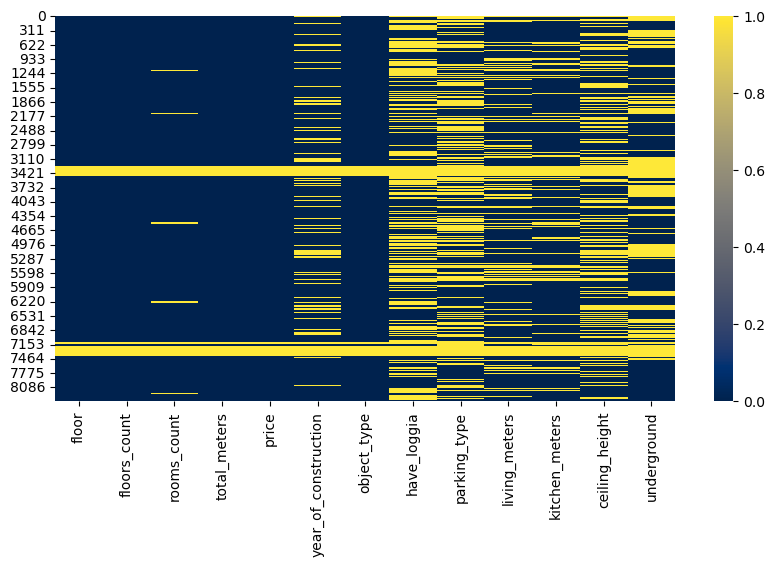

In [645]:
plt.figure(figsize=(10, 5))
sns.heatmap(Data_Purified.isnull(),cmap='cividis')

## Обработка Данных 

Data_Purified.info()

Посмотрим колонки которые должны иметь числовые значения 

* floor-
* floors_count
* rooms_count
* total_meters
* price
* kitchen_meters
* ceiling_height
* living_meters
* year_of_construction  

In [650]:
Data_Purified["floor"].unique()

array(['6', '1', '4', '5', '2', '3', '15', '8', '7', '9', '18', '13',
       '10', '11', '35', '22', '12', '20', '14', '19', '37', '24', '28',
       '17', '34', '16', '40', '21', '41', '30', '33', '29', '23', '25',
       '26', '75', '62', '31', '46', '48', '80', '53', '38', '27', '57',
       '59', '32', '36', '47', '82', nan, '39', '79', 'floor', '66', '60',
       '51'], dtype=object)

### Столбец имеет значемние анамалиюю floor обработаем и удалим его 

In [652]:
index = Data_Purified[Data_Purified["floor"] == "floor"].index

In [653]:
Data_Purified.drop(index , inplace=True ) 

In [656]:
Data_Purified["floors_count"].unique()

array(['6', '9', '4', '5', '7', '3', '2', '17', '10', '24', '1', '14',
       '18', '12', '23', '20', '41', '21', '43', '8', '59', '40', '27',
       '15', '13', '16', '22', '29', '25', '30', '49', '31', '39', '53',
       '28', '85', '35', '26', '32', '34', '57', '19', '11', '36', '68',
       '38', '51', '78', '79', '47', '33', '64', '75', '45', '37', '63',
       '95', '52', '54', '77', '46', '44', '67', '50', '48', '76', '42',
       '55', '56', nan, '97', '65', '66'], dtype=object)

In [660]:
Data_Purified["floors_count"] = Data_Purified["floors_count"].astype(float)

In [661]:
Data_Purified["floors_count"]

0        6.0
1        9.0
2        4.0
3        5.0
4        7.0
        ... 
8388    14.0
8389    25.0
8390     5.0
8391     6.0
8392    16.0
Name: floors_count, Length: 8392, dtype: float64

In [662]:
Data_Purified["rooms_count"].unique()

array(['1', '2', nan, '3', '4', '5'], dtype=object)

In [663]:
Data_Purified["rooms_count"] = Data_Purified["rooms_count"].astype(float)

In [664]:
Data_Purified["rooms_count"] 

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
8388    2.0
8389    2.0
8390    2.0
8391    2.0
8392    2.0
Name: rooms_count, Length: 8392, dtype: float64

In [665]:
Data_Purified["total_meters"].unique()

array(['20.7', '33.0', '14.0', ..., '30.47', '36.79', '48.39'],
      dtype=object)

In [666]:
Data_Purified["total_meters"] = Data_Purified["total_meters"].astype(float)

In [667]:
Data_Purified["total_meters"]

0       20.7
1       33.0
2       14.0
3       17.5
4       25.9
        ... 
8388    69.7
8389    48.1
8390    45.0
8391    34.0
8392    58.6
Name: total_meters, Length: 8392, dtype: float64

In [668]:
Data_Purified["price"].unique()

array(['2350000', '4150000', '1700000', ..., '9865233', '8607014',
       '13014356'], dtype=object)

In [669]:
Data_Purified["price"] = Data_Purified["price"].astype(float)

In [670]:
Data_Purified["kitchen_meters"].unique()

array(['1\xa0м²', '6\xa0м²', nan, '5\xa0м²', '5,6\xa0м²', '16\xa0м²',
       '3\xa0м²', '6,2\xa0м²', '7\xa0м²', '7,3\xa0м²', '6,1\xa0м²',
       '10\xa0м²', '9\xa0м²', '8\xa0м²', '5,7\xa0м²', '11\xa0м²',
       '7,5\xa0м²', '13,5\xa0м²', '6,5\xa0м²', '5,8\xa0м²', '20\xa0м²',
       '11,2\xa0м²', '7,8\xa0м²', '4\xa0м²', '7,9\xa0м²', '4,1\xa0м²',
       '12\xa0м²', '7,7\xa0м²', '8,1\xa0м²', '9,3\xa0м²', '10,2\xa0м²',
       '10,6\xa0м²', '8,5\xa0м²', '9,1\xa0м²', '4,5\xa0м²', '6,7\xa0м²',
       '45\xa0м²', '34,3\xa0м²', '25,5\xa0м²', '46,2\xa0м²', '4,9\xa0м²',
       '8,4\xa0м²', '24,9\xa0м²', '15\xa0м²', '15,8\xa0м²', '11,5\xa0м²',
       '5,5\xa0м²', '10,7\xa0м²', '19,4\xa0м²', '43,8\xa0м²',
       '44,5\xa0м²', '22,4\xa0м²', '25\xa0м²', '28,4\xa0м²', '19\xa0м²',
       '21\xa0м²', '5,1\xa0м²', '18,3\xa0м²', '3,8\xa0м²', '19,2\xa0м²',
       '16,2\xa0м²', '21,7\xa0м²', '12,5\xa0м²', '15,4\xa0м²', '28\xa0м²',
       '17\xa0м²', '10,4\xa0м²', '13,6\xa0м²', '21,8\xa0м²', '14\xa0м²',
    

## Обработаем kitchen_meters

In [672]:
Data_Purified["kitchen_meters"] = Data_Purified["kitchen_meters"].str.replace('\xa0м²', '', regex=True).str.replace(',', '.')

In [673]:
Data_Purified["kitchen_meters"].unique()

array(['1', '6', nan, '5', '5.6', '16', '3', '6.2', '7', '7.3', '6.1',
       '10', '9', '8', '5.7', '11', '7.5', '13.5', '6.5', '5.8', '20',
       '11.2', '7.8', '4', '7.9', '4.1', '12', '7.7', '8.1', '9.3',
       '10.2', '10.6', '8.5', '9.1', '4.5', '6.7', '45', '34.3', '25.5',
       '46.2', '4.9', '8.4', '24.9', '15', '15.8', '11.5', '5.5', '10.7',
       '19.4', '43.8', '44.5', '22.4', '25', '28.4', '19', '21', '5.1',
       '18.3', '3.8', '19.2', '16.2', '21.7', '12.5', '15.4', '28', '17',
       '10.4', '13.6', '21.8', '14', '12.9', '13', '29.2', '23', '15.7',
       '2.9', '8.2', '2.4', '20.7', '4.3', '18', '21.3', '11.6', '16.8',
       '3.9', '9.9', '19.3', '11.3', '14.8', '17.1', '21.4', '8.9',
       '18.2', '13.4', '16.4', '16.5', '8.7', '9.8', '10.8', '18.5',
       '16.1', '13.2', '8.6', '4.8', '9.5', '6.3', '3.5', '43', '65',
       '9.2', '12.7', '10.1', '7.1', '12.8', '10.5', '25.6', '6.4', '7.2',
       '9.7', '15.2', '7.6', '9.6', '3.2', '7.4', '5.2', '6.6', '2',


In [674]:
Data_Purified["kitchen_meters"] = Data_Purified["kitchen_meters"].astype(float)

In [675]:
Data_Purified["kitchen_meters"]

0        1.0
1        6.0
2        NaN
3        NaN
4        5.0
        ... 
8388    10.5
8389    16.1
8390     6.0
8391     8.0
8392    21.4
Name: kitchen_meters, Length: 8392, dtype: float64

In [676]:
 Data_Purified["ceiling_height"].unique()

array(['3\xa0м', '2,7\xa0м', nan, '3,5\xa0м', '2,5\xa0м', '2,9\xa0м',
       '2,8\xa0м', '2,4\xa0м', '2,6\xa0м', '2,65\xa0м', '2,73\xa0м',
       '4,6\xa0м', '3,25\xa0м', '2,85\xa0м', '3,2\xa0м', '2,64\xa0м',
       '3,6\xa0м', '3,06\xa0м', '3,1\xa0м', '3,15\xa0м', '3,35\xa0м',
       '2,92\xa0м', '3,12\xa0м', '5\xa0м', '3,3\xa0м', '2,87\xa0м',
       '2,95\xa0м', '2,82\xa0м', '2,99\xa0м', '3,08\xa0м', '3,4\xa0м',
       '3,27\xa0м', '2,75\xa0м', '3,9\xa0м', '6\xa0м', '3,43\xa0м',
       '2,51\xa0м', '3,05\xa0м', '2,78\xa0м', '5,2\xa0м', '2,72\xa0м',
       '2,63\xa0м', '2,62\xa0м', '2,89\xa0м', '2,68\xa0м', '2,66\xa0м',
       '3,09\xa0м', '2,55\xa0м', '2,84\xa0м', '2,48\xa0м', '4\xa0м',
       '2,67\xa0м', '2,74\xa0м', '3,59\xa0м', '3,04\xa0м', '2,56\xa0м',
       '2\xa0м', '2,42\xa0м', '3,02\xa0м', '3,26\xa0м', '4,5\xa0м',
       '5,7\xa0м', '3,23\xa0м', '3,14\xa0м', '3,65\xa0м', '3,03\xa0м',
       '3,24\xa0м', '2,77\xa0м', '4,2\xa0м', '3,55\xa0м', '2,57\xa0м',
       '3,31\xa0м', 

## Обработаем ceiling_height

In [678]:
Data_Purified["ceiling_height"] =  Data_Purified["ceiling_height"].str.replace('\xa0м' , "", regex=True).str.replace(",", ".")

In [679]:
Data_Purified["ceiling_height"] = Data_Purified["ceiling_height"].astype(float)

In [680]:
 Data_Purified["ceiling_height"]

0       3.00
1       2.70
2        NaN
3        NaN
4       3.50
        ... 
8388     NaN
8389    2.62
8390     NaN
8391    2.75
8392    2.62
Name: ceiling_height, Length: 8392, dtype: float64

In [683]:
Data_Purified["year_of_construction"].unique()  

array(['1917', '1975', nan, '1968', '2009', '1969', '1980', '1990',
       '1964', '2025', '2015', '1970', '1984', '1965', '2010', 'Аукцион',
       '1992', '2011', '1986', '1994', '1956', '1966', '1973', '1971',
       '1957', '2013', '1981', '1972', '1959', '2004', '1962', '2019',
       '1978', '1977', '2003', '1963', '1952', '2024', '2007', '1995',
       '1976', '1982', '1953', '2008', '2026', '2023', '1941', '2028',
       '1993', '2016', '2027', '2017', '2022', '1932', '2012', '1960',
       '2006', '1926', '2020', '1943', '2014', '2021', '1967', '1904',
       '1991', '2018', '1987', '1988', '1974', 'Напишите автору', '1979',
       '1929', '1989', '1985', '1930', '2005', '1958', '1996', '1940',
       '1948', '1961', '1938', '1997', '2002', '2001', '1999', '1983',
       '1998', '1902', '2000', '1915', '1910', '1939', '1954', '1897',
       '1955', '1900', 'Позвоните автору', '1949', '1947', '1901', '1909',
       '1600', '1951', '1936', '1931', '1950', '1934', '1928', '1945',

## Заметим анамалии "Аукцион, Позвоните автору, Позвоните автору" обработаем и удалим  их 


In [ ]:

index = Data_Purified[Data_Purified["year_of_construction"].isin(["Аукцион", "Позвоните автору", "Напишите автору"])].index

In [765]:
Data_Purified = Data_Purified.drop(index)

In [767]:
Data_Purified["year_of_construction"].unique()

array(['1917', '1975', nan, '1968', '2009', '1969', '1980', '1990',
       '1964', '2025', '2015', '1970', '1984', '1965', '2010', '1992',
       '2011', '1986', '1994', '1956', '1966', '1973', '1971', '1957',
       '2013', '1981', '1972', '1959', '2004', '1962', '2019', '1978',
       '1977', '2003', '1963', '1952', '2024', '2007', '1995', '1976',
       '1982', '1953', '2008', '2026', '2023', '1941', '2028', '1993',
       '2016', '2027', '2017', '2022', '1932', '2012', '1960', '2006',
       '1926', '2020', '1943', '2014', '2021', '1967', '1904', '1991',
       '2018', '1987', '1988', '1974', '1979', '1929', '1989', '1985',
       '1930', '2005', '1958', '1996', '1940', '1948', '1961', '1938',
       '1997', '2002', '2001', '1999', '1983', '1998', '1902', '2000',
       '1915', '1910', '1939', '1954', '1897', '1955', '1900', '1949',
       '1947', '1901', '1909', '1600', '1951', '1936', '1931', '1950',
       '1934', '1928', '1945', '1937', '1927', '1896', '1777', '2031',
       '1

In [769]:
Data_Purified["year_of_construction"] = Data_Purified["year_of_construction"].astype(float)

## Обработаем Текстовые данные 